## Gradient Boosted on P0 Prediction for Test Set

In [14]:
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import sys
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Get the directory of the current script
try:
    # This will work if the script is being run as a file
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # Use the current working directory if __file__ is not defined
    current_dir = os.getcwd()
# Move up one directory level from EDA to the parent directory
parent_dir = os.path.dirname(current_dir)
# Construct the path to the xdrive folder
xdrive_path = os.path.join(parent_dir, 'xdrive')
# Add the xdrive path to sys.path
sys.path.append(xdrive_path)
featureeng_path = os.path.join(parent_dir, 'Feature Engineering')
# Add the xdrive path to sys.path
sys.path.append(featureeng_path)
# Construct the path to the xdrive folder
xdrive_path = os.path.join(parent_dir, 'Pipeline')
# Add the xdrive path to sys.path
sys.path.append(xdrive_path)
from build_a_pipeline import build_pipeline_P0_foward_price

In [23]:
x_train, x_val, X_test, y_train, y_val, y_test = build_pipeline_P0_foward_price(drop_features=True, 
                                                                                remove_outliers = True, 
                                                                                percentage_of_outliers=0.01, 
                                                                                train_size = 0.75, 
                                                                                val_size = 0.15,
                                                                                deal_with_skewness = True) #drop_features = False
model_performance = []
x_val = x_val.sort_index(ascending=True)
y_val = y_val.sort_index(ascending=True)
X_test = X_test.sort_index(ascending=True)
y_test = y_test.sort_index(ascending=True)
x_train = x_train.sort_index(ascending=True)
y_train = y_train.sort_index(ascending=True)
X_combined = pd.concat([x_train, x_val], axis=0)
y_combined = pd.concat([y_train, y_val], axis=0)

C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



In [16]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np
# Create XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
model.fit(X_combined, y_combined)
# Predictions and evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
# Predictions on validation data
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score
# R-squared score
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')
model_performance.append({
    'Model': model,
    'Mean Squared Error': mse,
    'Root Mean Squared Error': rmse,
    'R-squared': r2,
})

Mean Squared Error: 26075.96800157303
Root Mean Squared Error: 161.48054991723626
Mean Squared Error: 26075.96800157303
Root Mean Squared Error: 161.48054991723626
R-squared: -0.5604596436030718


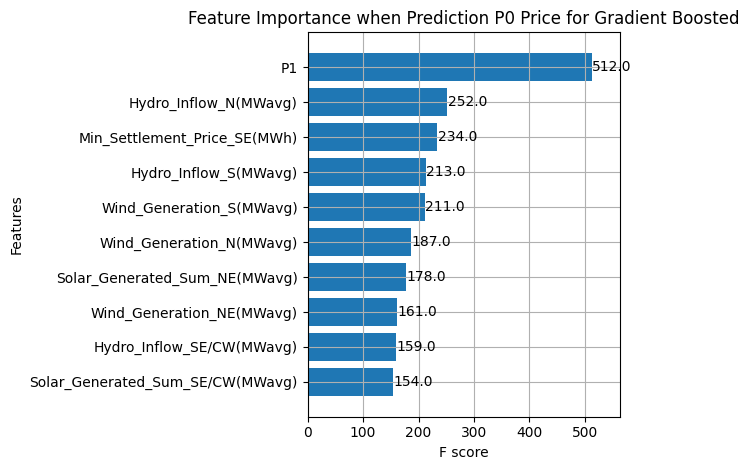

In [17]:
import matplotlib.pyplot as plt
# Plot feature importance using the built-in XGBoost plot_importance method
xgb.plot_importance(model, importance_type='weight', max_num_features=10, height=0.8)
plt.title('Feature Importance when Prediction P0 Price for Gradient Boosted')
plt.tight_layout()
plt.show()

In [21]:
import plotly.express as px
import pandas as pd

# Assuming y_test and y_pred are pandas Series with datetime indexes
# Combine actual and predicted values into a single DataFrame for Plotly
df_plot = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
}, index=X_test.index)

# Reset index for Plotly compatibility
df_plot = df_plot.reset_index()
df_plot = df_plot.rename(columns={'index': 'DateTime'})  # Rename the index to a column

# Melt the DataFrame to make it long-form for Plotly
df_melted = df_plot.melt(id_vars='DateTime', value_vars=['Actual', 'Predicted'], 
                         var_name='Type', value_name='Values')

# Create the line plot using Plotly Express
fig = px.line(df_melted, x='DateTime', y='Values', color='Type',
              title='Actual vs Predicted Values',
              labels={'Values': 'Values', 'DateTime': 'DateTime'},
              line_shape='linear')

# Update layout for better readability
fig.update_layout(
    xaxis_title="DateTime",
    yaxis_title="Values",
    xaxis_tickformat="%Y-%m-%d",  # Format for the x-axis
    template="plotly_white",  # Optional: Change theme
    width=1200,  # Adjust plot width
    height=600   # Adjust plot height
)

# Show the interactive plot
fig.show()


Predict Last Month

In [22]:
last_2_months = X_test[X_test.index >= (X_test.index[-1] - pd.DateOffset(months=2))]
y_test_last = y_test[X_test.index >= (X_test.index[-1] - pd.DateOffset(months=2))]

TypeError: unsupported operand type(s) for -: 'int' and 'DateOffset'

In [ ]:
y_pred = model.predict(last_2_months)
from sklearn.metrics import r2_score
# R-squared score
r2 = r2_score(y_test_last, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')
model_performance.append({
    'Model': model,
    'Mean Squared Error': mse,
    'Root Mean Squared Error': rmse,
    'R-squared': r2,
})

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plotting y_actual vs y_pred
plt.figure(figsize=(12, 6))
plt.plot(last_2_months.index, y_test_last, label='Actual', marker='o')
plt.plot(last_2_months.index, y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('DateTime')
plt.ylabel('Values')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()